# ---Coronavirus---

Data taken from Johns Hopkins Covid Repository https://github.com/CSSEGISandData/COVID-19

Joined with population data from The World Bank https://data.worldbank.org/indicator/SP.POP.TOTL

Missing data filled in with Wikipedia population data http://wikipedia.org

Code and data can be found at https://github.com/Renaissanc3Man/Coronavirus

-------------------------------------------------------------------------------------------------

#### US Data Notebook: https://rb.gy/zm4edi

#### World Data Notebook: https://rb.gy/rtvi9r

In [1]:
import sys
sys.path.append(".")
sys.path.append(r'C:\__YOUTUBE__\__POLITICS__\Coronavirus')
from corona_library import *
from IPython.display import Image

myfile = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\coronavirus_world.csv'
last_update_time = get_time_of_file_update(myfile)
country_df = pd.read_csv(myfile,low_memory=False)

print('Data Last Updated: ' + last_update_time.strftime('%m-%d-%Y %I:%m %p'))

Data Last Updated: 09-17-2020 02:09 PM


In [2]:
#import
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Jupyter setup
init_notebook_mode(connected=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
worst_countries_df = country_df.copy()
worst_countries_df = worst_countries_df[worst_countries_df['Date'] == worst_countries_df['Date'].max()]
worst_countries_df = worst_countries_df[worst_countries_df['Population'] > 1000000.0]
worst_countries_df = safe_reset_index(worst_countries_df.sort_values(['Deaths_Per_Population'],ascending=False))
worst_countries_df = worst_countries_df[['Country_Region','Population','Deaths_Per_Population','Confirmed_Per_Population','Deaths','Confirmed']]
print(worst_countries_df.head(15))
print(list(worst_countries_df.head(15)['Country_Region']))

   Country_Region   Population  Deaths_Per_Population  \
0      US Only NJ    8882000.0               0.001807   
1   US Only NY NJ   28332000.0               0.001733   
2      US Only NY   19450000.0               0.001699   
3            Peru   32510450.0               0.000951   
4         Belgium   11484060.0               0.000865   
5         Bolivia   11513100.0               0.000650   
6           Spain   47076780.0               0.000642   
7           Chile   18952040.0               0.000636   
8          Brazil  211049530.0               0.000635   
9         Ecuador   17373660.0               0.000633   
10             UK   66834400.0               0.000625   
11     US Only FL   21480000.0               0.000602   
12             US  328239520.0               0.000599   
13          Italy   60297400.0               0.000591   
14         Sweden   10285450.0               0.000570   

    Confirmed_Per_Population    Deaths  Confirmed  
0                   0.022269   1605

In [4]:
#reduce data to only worst hit states
countries_list = ['US Only NY NJ',
                  'Peru',
                  'Belgium',
                  'Spain',
                  'UK',
                  'Chile',
                  'Brazil',
                  'Italy',
                  'US',
                  'Sweden']
country_df = country_df[country_df['Country_Region'].isin(countries_list)]
countries_list = sorted(list(country_df['Country_Region'].unique()))

colors_dict = {'US Only NY NJ':'purple',
              'Peru':'#17becf',   # blue-teal
              'Belgium':'brown',
              'Spain':'#e377c2',  # raspberry yogurt pink
              'UK':'blue',
              'Chile':'orange',
              'Brazil':'yellow',
              'Italy':'green',
              'US':'red',
              'Sweden':'black'}

#holdover from US notebook
rename_dict = dict(zip(countries_list,countries_list))

country_df['Date_temp'] = pd.to_datetime(country_df['Date'])
country_df = country_df[country_df['Date_temp']>=np.datetime64('2020-04-12')]

Static Image:


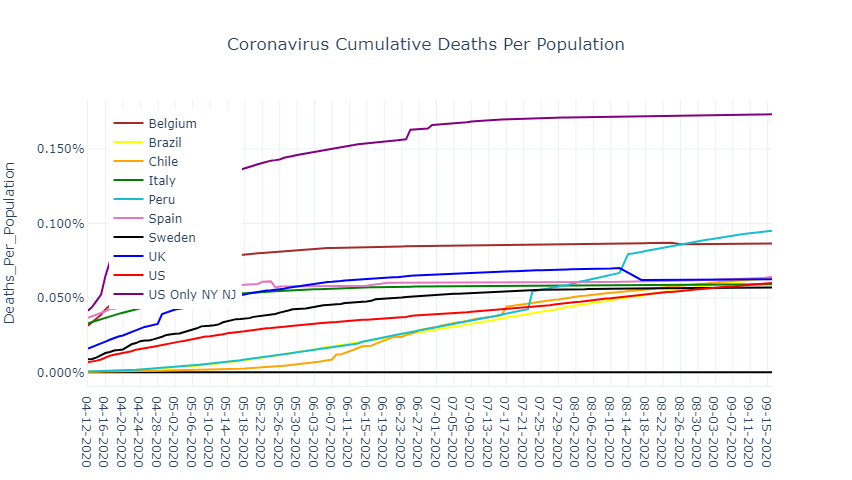

In [5]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Per_Population'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(
                showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Deaths Per Population',
                title_x= 0.5,
                yaxis={'title':'Deaths_Per_Population',
                       'tickformat':'.3%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W1-CV_Cum_Deaths_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


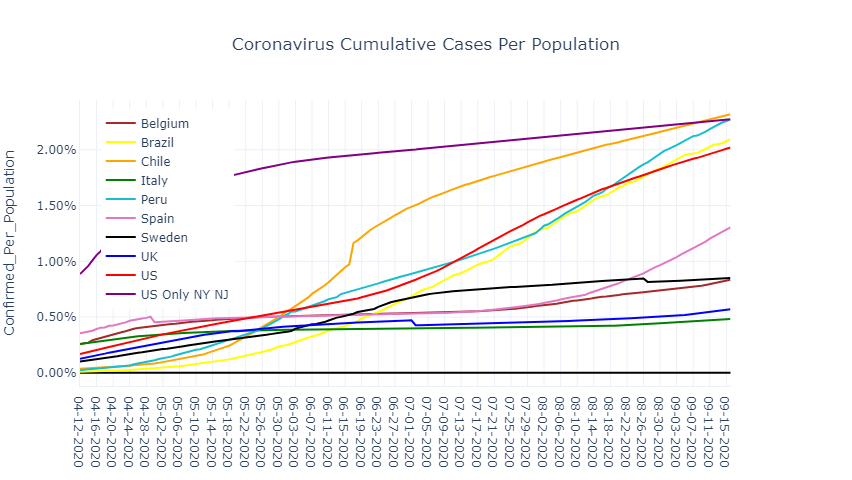

In [6]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Per_Population'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)
#    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
#                               y=country_df[country_df['Country_Region']==mycountry]['People_Tested_Per_Population'],
#                               name = rename_dict[mycountry] + ' Tests',
#                               line = {'color':colors_dict[mycountry],
#                                      'dash':'dash'},
#                               opacity = 0.25),
#                  secondary_y = True)
fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Cases Per Population',
                title_x=0.5,
                yaxis={'title':'Confirmed_Per_Population',
                       'tickformat':'.2%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template = 'plotly_white')
#fig.update_yaxes(title_text='People_Tested_Per_Population',secondary_y=True,tickformat='.1%')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W2-CV_Cum_Cases_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


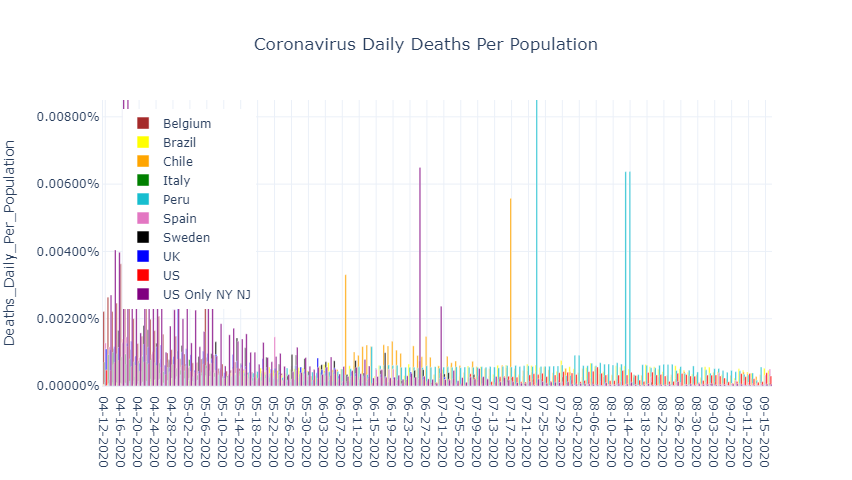

In [7]:
data = []
for mycountry in countries_list:
    data.append(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Daily_Per_Population'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Daily Deaths Per Population',
                title_x= 0.5,
                yaxis={'title':'Deaths_Daily_Per_Population',
                       'tickformat':'.5%',
                       'range': [0.0,0.000085],
                      'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
#fig.update_layout(annotations = [{'x':'06-25-2020',
#                                 'y':0.000075,
#                                 'xref':'x','yref':'y',
#                                 'showarrow':True,'arrowhead':7,'ax':85,'ay':0,
#                                 'text':r'NJ 06-25-2020:<br>0.0202%,<br>(Probable Deaths Added)'}])
iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W3-CV_Daily_Deaths_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


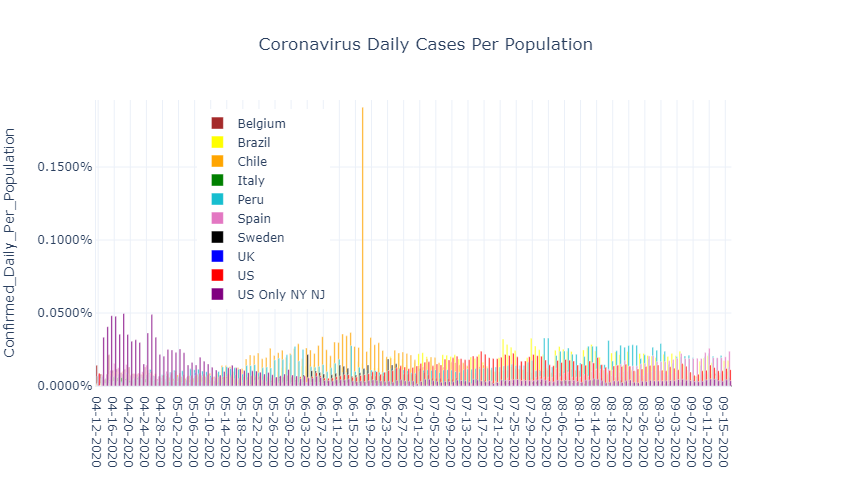

In [8]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Daily_Per_Population'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},
                               width = 0.35),
                  secondary_y = False)
fig.update_layout(showlegend = True,
                legend= dict(x=0.15,y=0.97),
                title='Coronavirus Daily Cases Per Population',
                title_x= 0.5,
                yaxis={'title':'Confirmed_Daily_Per_Population',
                       'range': [0.0,country_df['Confirmed_Daily_Per_Population'].max()+0.00005],
                       'tickformat':'.4%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W4-CV_Daily_Cases_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


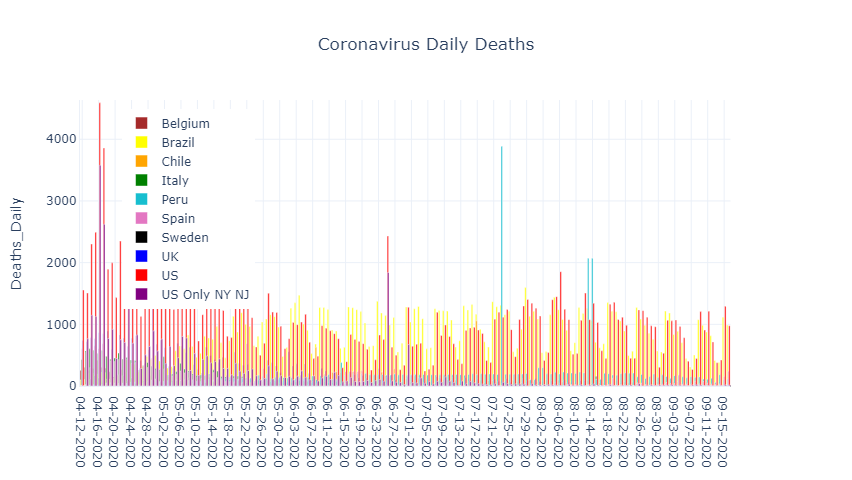

In [9]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Daily'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35),
                  secondary_y = False)
fig.update_layout(showlegend = True,
                legend= dict(x=0.06,y=0.97),
                title='Coronavirus Daily Deaths',
                title_x= 0.5,
                yaxis={'title':'Deaths_Daily',
                       'range': [0.0,country_df['Deaths_Daily'].max() * 1.01],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W5-CV_Daily_Deaths.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


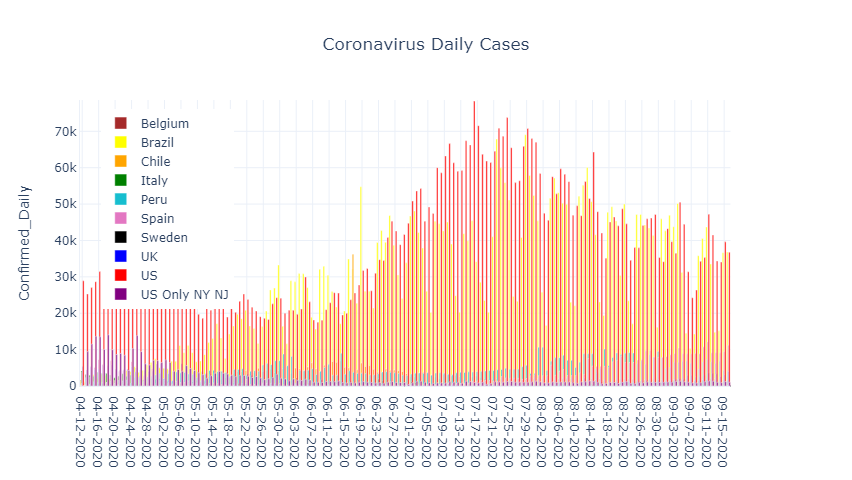

In [10]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Daily'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Daily Cases',
                title_x= 0.5,
                yaxis={'title':'Confirmed_Daily',
                       'range': [0.0,country_df['Confirmed_Daily'].max()+300.0],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W6-CV_Daily_Cases.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


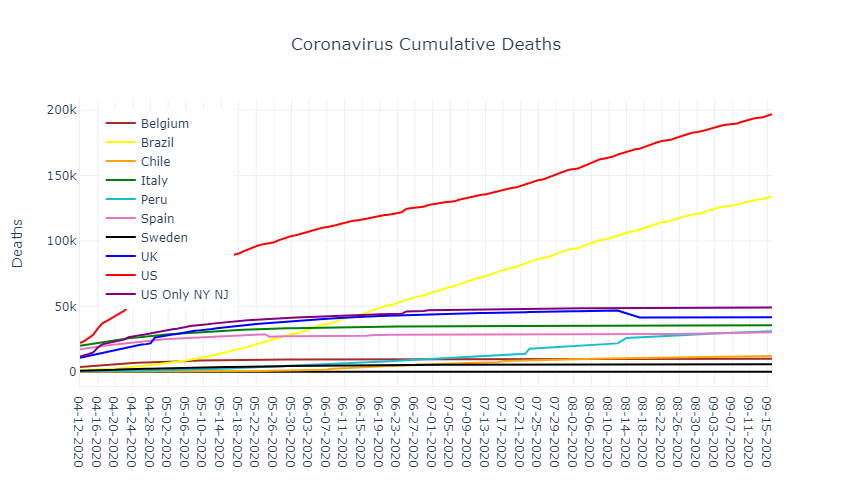

In [11]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Deaths',
                title_x= 0.5,
                yaxis={'title':'Deaths',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W7-CV_Cum_Deaths.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


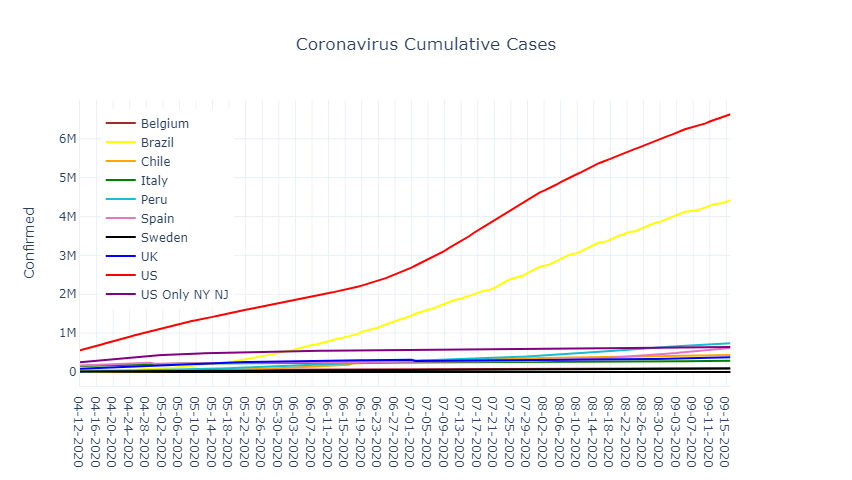

In [12]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Cases',
                title_x= 0.5,
                yaxis={'title':'Confirmed',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W8-CV_Cum-Cases.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


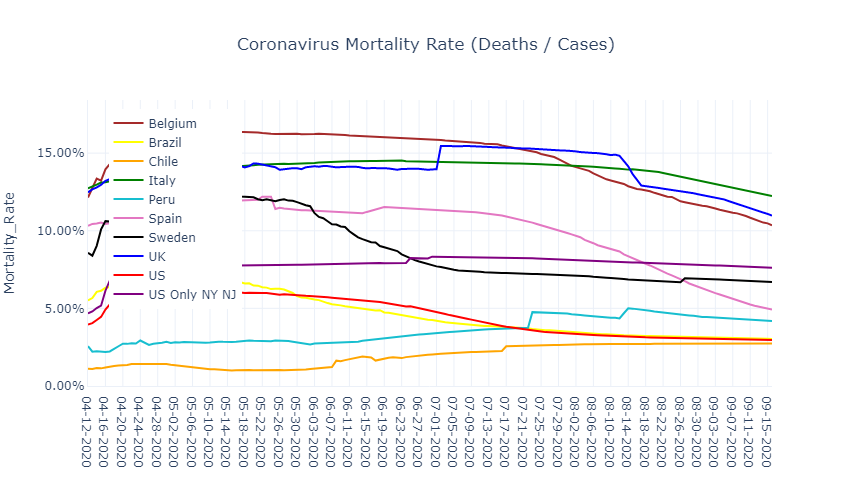

In [13]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Mortality_Rate'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Mortality Rate (Deaths / Cases)',
                title_x= 0.5,
                yaxis={'title':'Mortality_Rate',
                       'tickformat':'.2%',
                       'range': [0.0,country_df['Mortality_Rate'].max()+0.02],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\W9-CV_Mortality_Rate.png'
fig.write_image(myfilename,width = 852,height = 480)
print('Static Image:')
Image(filename=myfilename) 